# Machine Learning and Artificial Intelligence Research
### Network Security: Instrusion Detection

## Table of contents
* [Introduction](#introduction_security)
  * [Background / Problem](#background_problem_security)
* [Data](#data_security)
  * [Import the Data](#pulldata_security)
  * [Exploration (Missing Values, Data Dispersion, Data Types)](#evaluate_security)
  * [Visualizations](#visual_barh_security)
    * [Correlation Matrix](#corr_matrix_security) 
    * [Review Dataset Balance](#data_balance_security)     
  * [Data Processing and Preparation](#dataprep_security)
  * [Set Classification Target Values](#setclasstarget_security)
  * [Perform One Hot Encoding](#onehot_security)
  * [Scale / Normalize (for continuous features)](#normalize_security)
  * [Set Train / Test Splits](#train_test_security)
* [Methodology - Supervised Learning: Classification](#method_class_security)
  * [Random Forest](#randomforest_security)
  * [Support Vector Machines](#svm_security)
  * [Logistic Regression](#lr_security)
  * [Gaussian Naive Bayes](#naive_bayes_security)
  * [Gradient Boosting](#gradient_boosting_security)
  * [Multi-Layer Perceptron](#multi_layer_security)
* [Model Comparison](#mod_comp_security)
* [Conclusion](#conclusion_security)



## Introduction <a name="introduction_security"></a>

### Background / Problem <a name="background_problem"></a>

Machine Learning (ML) can be a major cybersecurity tool to help companies and governments identify cyber threats. Below are some examples of how enterprises can implement ML to fight cyber threats.
1. Cyber Threat Identification to monitor suspicious activity of outgoing and incoming calls as well as system requests.
1.  AI-Based Antivirus Software that is integrated with ML and identifies malware by its abnormal behavior patterns.
1. Email Monitoring to identify suspicious patterns and phrases associated with phishing attacks, using natural language processing and anomaly detection technologies to identify threats. 
* Inspirational articles and references include:
  * https://thecleverprogrammer.com/2020/08/12/network-security-with-machine-learning/
  * https://www.geeksforgeeks.org/top-5-applications-of-machine-learning-in-cyber-security/
  * https://github.com/rajtulluri/Intrusion-Detection/blob/master/Performance%20Evaluation%20of%20Supervised%20Machine%20Learning%20Algorithms%20for%20Intrusion%20Detection.ipynb

### Data Description
The data includes four distinct classes of attacks: Denial of Service (DoS), Probe, User to Root (U2R), and Remote to Local (R2L). See below for a brief description of each attack:
* DoS: attacks the target system by attempting to shut down traffic flow by overloading the system. An example of this could be an online retailer getting flooded with online orders on a day with a big sale. Since the network can’t handle all the requests, it will shut down, preventing paying customers from completing purchases. This is the most common attack in the data set.
* Probe or surveillance is an attack that tries to get information from a network. The goal here is to act like a thief and steal important information, whether it be personal information about clients or banking information.
* U2R is an attack that starts off with a normal user account and tries to gain access to the system or network, as a super-user (root). The attacker attempts to exploit the vulnerabilities in a system to gain root privileges/access.
* R2L is an attack that tries to gain local access to a remote machine. An attacker does not have local access to the system/network, and tries to “hack” their way into the network.

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from collections import defaultdict

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines

## Data <a name="data_security"></a>

### Import the Data <a name="pulldata_security"></a>

In [51]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted', 
                'num_root', 'num_file_creations', 'num_shells', 
                'num_access_files', 'num_outbound_cmds', 
                'is_host_login', 'is_guest_login', 'count', 
                'srv_count', 'serror_rate', 'srv_serror_rate', 
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate', 
                'dst_host_count', 'dst_host_srv_count', 
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
                'attack_type', 'success_pred']

In [52]:
col_names = np.array(header_names)

In [53]:
train = pd.read_csv('KDDTrain+.txt', header=None, names=header_names)
test = pd.read_csv('KDDTest+.txt', header=None, names=header_names)
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


### Exploration (Missing Values, Data Dispersion, Data Types) <a name="evaluate_security"></a>

As shown previously, the test set contains types of attacks which are not in the train set. Every attack has a different kind of signature. The model can learn the signature of a type of an attack and can thus detect it in future. But for those attacks whose signatures are not known might not always be detected by the model. To avoid such an issue, the two sets are combined and then randomly split into train and test set again.

The train set will be used to train the model and test set for testing the model on unseen data.

In [54]:
combined_data = pd.concat([train,test],axis=0)

In [55]:
combined_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [56]:
combined_data.shape

(148517, 43)

### Set Classification Target Values <a name="setclasstarget_security"></a>

Our aim here is to check whether an intrusion is detected or not. We do not go deeper into the classification of the attacks. Thus, we add a 'target' column which maps label 'normal' to 0 and any intrusion as 1.

In [57]:
combined_data['target'] = combined_data.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)

In [58]:
combined_data.shape

(148517, 44)

In [59]:
# export for viewing
combined_data.to_excel(r'C:\Users\jboyce\Desktop\combined_data.xlsx')

In [60]:
# set the attack categories / classes

In [61]:
list_dos = ['apache2','back','land','neptune','mailbomb'
            ,'pod','processtable','smurf','teardrop','udpstorm','worm']

In [62]:
list_probe = ['lpsweep','mscan','nmap','portsweep','saint','satan']

In [63]:
list_u2r = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']

In [64]:
list_r2l = ['ftp_write','guess_passwd','httptunnel','imap','multihop'
            ,'named','phf','sendmail','snmpgetattack','spy','snmpguess'
            ,'warezclient','warezmaster','xlock','xsnoop']

In [65]:
# define attack Classes
combined_data.loc[combined_data['attack_type'].isin(list_dos), 'attack_category'] = 'DoS'
combined_data.loc[combined_data['attack_type'].isin(list_probe), 'attack_category'] = 'Probe'
combined_data.loc[combined_data['attack_type'].isin(list_u2r), 'attack_category'] = 'U2R'
combined_data.loc[combined_data['attack_type'].isin(list_r2l), 'attack_category'] = 'R2L'
combined_data.loc[~combined_data['attack_type'].isin(list_dos + list_probe + list_u2r+ list_r2l), 'attack_category'] = 'Benign'

In [66]:
# list(combined_data.attack_type.unique())
combined_data.attack_type.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [67]:
# list(combined_data.attack_type.unique())
combined_data.attack_category.unique()

array(['Benign', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [68]:
combined_data.info

<bound method DataFrame.info of        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data   SF        491          0     0   
1             0           udp     other   SF        146          0     0   
2             0           tcp   private   S0          0          0     0   
3             0           tcp      http   SF        232       8153     0   
4             0           tcp      http   SF        199        420     0   
...         ...           ...       ...  ...        ...        ...   ...   
22539         0           tcp      smtp   SF        794        333     0   
22540         0           tcp      http   SF        317        938     0   
22541         0           tcp      http   SF      54540       8314     0   
22542         0           udp  domain_u   SF         42         42     0   
22543         0           tcp    sunrpc  REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_

### Visualizations <a name="visual_barh_security"></a>

In [69]:
# data_barh_attacks = combined_data.sort_values(by='attack_type', ascending=False) #, inplace=True)
data_barh_attacks = combined_data['attack_type'].value_counts() #sort_values(by='attack_type', ascending=False) #, inplace=True)

In [70]:
# combined_data.groupby('attack_type').agg(
#             attack_mean = ('attack_type', 'mean'),
#             attack_count = ('attack_type', 'count'))

In [71]:
# set index to attack_type, rename counts to Total
data_barh_attacks.sort_values(ascending=True, inplace=True) #by='attack_type', 

In [72]:
data_barh_attacks.head()

spy          2
sqlattack    2
udpstorm     2
worm         2
xsnoop       4
Name: attack_type, dtype: int64

In [73]:
# check available plotting styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [74]:
mpl.style.use(['ggplot'])

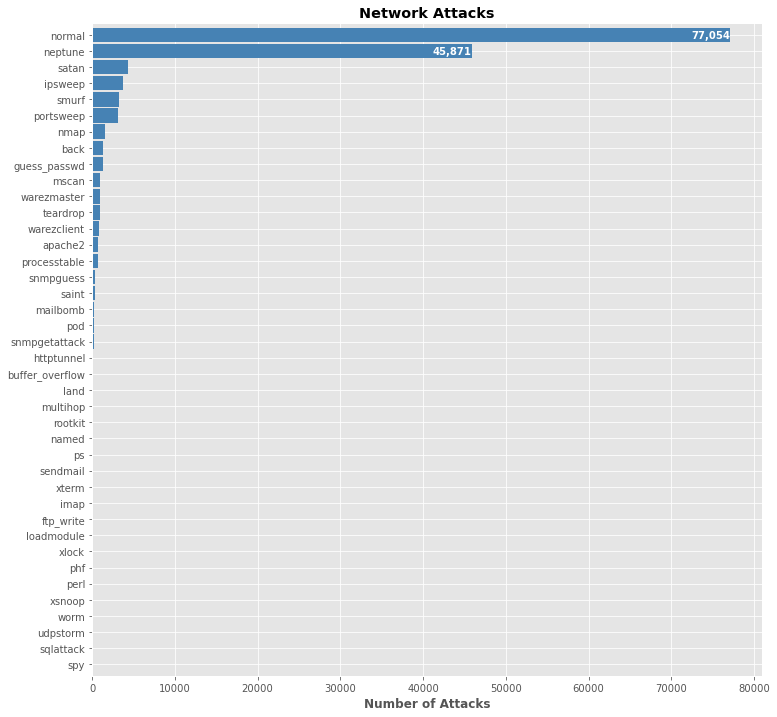

In [75]:
# Plot attack types
# generate plot

data_barh_attacks.plot(kind='barh', width=0.9, figsize=(12, 12), color='steelblue') # height=0.8, 
plt.xlabel('Number of Attacks', fontweight='bold')
plt.title('Network Attacks', fontweight='bold')

# ax = plt.axes()
# ax.set_facecolor("yellow")

# annotate value labels to each country
for index, value in enumerate(data_barh_attacks):
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4700, index - 0.20), color='white', fontweight='bold')

plt.show()

In [76]:
# data_barh_attacks = combined_data.sort_values(by='attack_type', ascending=False) #, inplace=True)
data_barh_categories = combined_data['attack_category'].value_counts() #sort_values(by='attack_type', ascending=False) #, inplace=True)

In [77]:
data_barh_categories.shape

(5,)

In [78]:
# set index to attack_type, rename counts to Total
data_barh_categories.sort_values(ascending=True, inplace=True) #by='attack_type', 

In [79]:
data_barh_categories.head()

U2R         119
R2L        3880
Probe     10337
DoS       53387
Benign    80794
Name: attack_category, dtype: int64

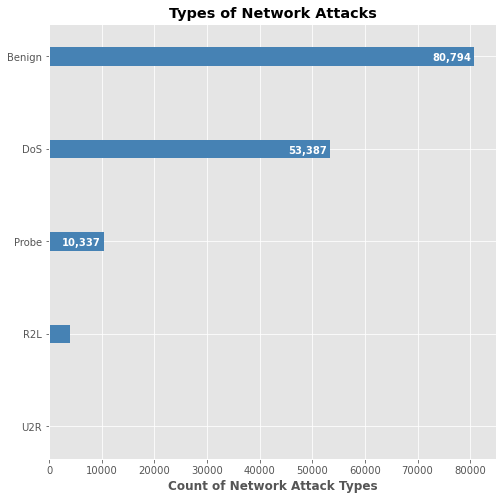

In [80]:
# Plot attack types
# generate plot

data_barh_categories.plot(kind='barh', width=0.2, figsize=(8, 8), color='steelblue') # width=0.9, # height=0.8, 
plt.xlabel('Count of Network Attack Types', fontweight='bold')
plt.title('Types of Network Attacks', fontweight='bold')

# ax = plt.axes()
# ax.set_facecolor("yellow")

# annotate value labels to each country
for index, value in enumerate(data_barh_categories):
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 8000, index - 0.05), color='white', fontweight='bold')

plt.show()

In [81]:
# should encode before train/test split

### Perform One Hot Encoding <a name="onehot_security"></a>

In [82]:
nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

In [83]:
nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [84]:
# PENDING - CHECK COLS - GOT ERROR ON attack_type portsweep to float. Need to delete
nominal_cols

['protocol_type', 'service', 'flag']

In [85]:
# perform one-hot encoding
X = combined_data.drop(columns=['target','attack_type','attack_category'],axis=1)
X_onehot = pd.get_dummies(X, columns=nominal_cols)
y = combined_data.target
indices = X.index

Now, it's time to scale the data. Use MinMaxScaler on StandardScaler if you want the scaling operation to keep the small standard deviations of the original series or if you want to keep zero entries in the sparse data. 

Outliers in your data can seriously and negatively skew the results of standard scaling and normalization. If the data contains outliers, sklearn.preprocessing.RobustScaler will be more suitable for this problem of Network Security. RobustScaler uses robust estimates such as median and quartile ranges, so it won’t be affected as much by outliers

Using the 'duration' feature as an example, let's see how the different scalers mentioned above affect the resulting scaled data.

In [86]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = X_onehot['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.485170e+05
mean    -5.501890e-18
std      1.000003e+00
min     -1.124811e-01
25%     -1.124811e-01
50%     -1.124811e-01
75%     -1.124811e-01
max      2.334247e+01
dtype: float64

In [87]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    148517.000000
mean          0.004796
std           0.042635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [88]:
min_max_scaled_durations #.flatten()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [89]:
min_max_scaled_durations.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(durations)
robust_scaled_durations = robust_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    148517.000000
mean        276.779305
std        2460.683131
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       57715.000000
dtype: float64

Now that we've seen the differences in the the scalers, let's use the StandardScaler. Using other scalers may be an enhancement opportunity down the road.

In [91]:
# scale the population that has the one hot transformation
# but only scale the numeric columns
standard_scaler = StandardScaler().fit(X_onehot[numeric_cols])
standard_scaler.transform(X_onehot[numeric_cols])

array([[-1.12481056e-01, -7.34564438e-03, -4.61422891e-03, ...,
        -5.84812691e-01, -2.67150972e-01, -4.06814676e-01],
       [-1.12481056e-01, -7.40941997e-03, -4.61422891e-03, ...,
        -5.84812691e-01, -4.22074453e-01, -4.06814676e-01],
       [-1.12481056e-01, -7.43640906e-03, -4.61422891e-03, ...,
         1.74229525e+00, -4.22074453e-01, -4.06814676e-01],
       ...,
       [-1.12481056e-01,  2.64567957e-03, -2.36933291e-03, ...,
        -5.84812691e-01, -2.05181580e-01, -1.98034706e-01],
       [-1.12481056e-01, -7.42864507e-03, -4.60288833e-03, ...,
        -5.84812691e-01, -4.22074453e-01, -4.06814676e-01],
       [-1.12481056e-01, -7.43640906e-03, -4.61422891e-03, ...,
        -5.84812691e-01,  9.41252172e-01,  2.57575633e+00]])

### Set Train / Test Splits <a name="train_test_security"></a>

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_onehot, y, indices, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Train set (indices):', indices_train)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Test set (indices): ', indices_test)

Train set: (103961, 123) (103961,)
Train set (indices): Int64Index([  2255, 112691, 124490,  41675,  22145,   2719,  24721,  90750,
             38164,  23872,
            ...
             20062,  79981,  73575, 107578,  94601, 115144,  16962,   3411,
            120705, 115397],
           dtype='int64', length=103961)
Test set: (44556, 123) (44556,)
Test set (indices):  Int64Index([ 68737,  97535,  35901,  64050, 104108,  33973,  81084, 125966,
            101621,  65367,
            ...
             87067,  75956,  95073,  12268,  69461,   6025, 123409,  12434,
             91721, 121892],
           dtype='int64', length=44556)


## Methodology - Supervised Learning: Classification <a name="method_class_security"></a>

We will utilize the following models in an attempt to solve our intrusion detection classification problem.

* Random Forest
* Support Vector Machines
* Logistic Regression
* Gaussian Naive Bayes
* Gradient Boosting
* Multi-Layer Perceptron

### Random Forest <a name="randomforest_security"></a>

The Random Forest model, an ensemble technique, conquers the bias and overfitting issues that plague Decision Tree classifiers used singly. Random forests overcome this using a voting system comprised of its forest of multiple "weaker" decision trees, each fit on a random subset of data. The aggregated output is the final classification.

In [93]:
# from sklearn.ensemble import RandomForestClassifier

mod_rf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
mod_rf.fit(X_train, y_train)

print("Train score: ",mod_rf.score(X_train, y_train))

pred_rf = mod_rf.predict(X_test)
print('Test score:',mod_rf.score(X_test, y_test))

print("Classification report: ",classification_report(pred_rf,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test score: 0.999281802675285
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23224
           1       1.00      1.00      1.00     21332

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556

Average weighted precision:  0.9988280517532345
Average weighted recall:  0.9996715773669889
Average weighted f1 score:  0.9992496365427004


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


In [94]:
from sklearn.model_selection import cross_val_score


In [95]:
# from sklearn.ensemble import RandomForestClassifier
# randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
# score=cross_val_score(model_rf,X,y,cv=10)
# score.mean()

In [96]:
# score

### Support Vector Machines <a name="svm_security"></a>

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [97]:
# sklearn.svm.SVC takes long time to run...skip for now
# maybe try linear support vector classification...docs say svc takes too long when >10k+ samples 
# try alternative svm models sklearn.svm.SVR, 
# sklearn.svm.NuSVC # slow as well
# sklearn.svm.SVR slow as well
# sklearn.svm.NuSVR - no probability
"""
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import SVR
# from sklearn.svm import NuSVR # no probability

# from sklearn.svm import LinearSVC

# mod_svm = SVC(kernel='linear', probability=True)
# mod_svm = LinearSVC() # DOESN'T HAVE PRED_PROB
# mod_svm = NuSVC(kernel='linear', probability=True)
# mod_svm = SVR(kernel='linear', probability=True)
mod_svm = NuSVR(kernel='linear', probability=True)

mod_svm.fit(X_train, y_train)

print("Train score: ",mod_svm.score(X_train, y_train))

pred_svm = mod_svm.predict(X_test)
print('Test score:',mod_svm.score(X_test, y_test))

print("Classification report: ",classification_report(pred_svm,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_svm))
print("Average weighted recall: ",recall_score(y_test,pred_svm))
print("Average weighted f1 score: ",f1_score(y_test,pred_svm))
"""

'\nfrom sklearn.svm import SVC\nfrom sklearn.svm import NuSVC\nfrom sklearn.svm import SVR\n# from sklearn.svm import NuSVR # no probability\n\n# from sklearn.svm import LinearSVC\n\n# mod_svm = SVC(kernel=\'linear\', probability=True)\n# mod_svm = LinearSVC() # DOESN\'T HAVE PRED_PROB\n# mod_svm = NuSVC(kernel=\'linear\', probability=True)\n# mod_svm = SVR(kernel=\'linear\', probability=True)\nmod_svm = NuSVR(kernel=\'linear\', probability=True)\n\nmod_svm.fit(X_train, y_train)\n\nprint("Train score: ",mod_svm.score(X_train, y_train))\n\npred_svm = mod_svm.predict(X_test)\nprint(\'Test score:\',mod_svm.score(X_test, y_test))\n\nprint("Classification report: ",classification_report(pred_svm,y_test))\n\nprint("Average weighted precision: ",precision_score(y_test,pred_svm))\nprint("Average weighted recall: ",recall_score(y_test,pred_svm))\nprint("Average weighted f1 score: ",f1_score(y_test,pred_svm))\n'

### Logistic Regression <a name="lr_security"></a>

Logistic Regression classifcation is a variation of Linear Regression, and is useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables. It does this by transforming the linear regression using the s-shaped sigmoid function 𝜎. The resulting classifier outputs are between 0 and 1 (binary outcomes like yes or no, true or false); values larger than 0.5 result in the classifier setting outputs to 1 with the remaining values set to 0.

In [98]:
# from sklearn.linear_model import LogisticRegression

mod_lr = LogisticRegression(solver='liblinear') #adding liblinear solved AttributeError: 'str' object has no attribute 'decode'
mod_lr.fit(X_train, y_train)

print("Train score: ",mod_lr.score(X_train, y_train))

pred_lr = mod_lr.predict(X_test)
print('Test score:',mod_lr.score(X_test, y_test))

print("Classification report: ",classification_report(pred_lr,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_lr))
print("Average weighted recall: ",recall_score(y_test,pred_lr))
print("Average weighted f1 score: ",f1_score(y_test,pred_lr))

Train score:  0.8594665307182501
Test score: 0.862195888320316
Classification report:                precision    recall  f1-score   support

           0       0.92      0.84      0.87     25524
           1       0.80      0.90      0.85     19032

    accuracy                           0.86     44556
   macro avg       0.86      0.87      0.86     44556
weighted avg       0.87      0.86      0.86     44556

Average weighted precision:  0.8986443883984867
Average weighted recall:  0.8024303274842827
Average weighted f1 score:  0.8478163882417094


### Gaussian Naive Bayes <a name="naive_bayes_security"></a>

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes' theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier. Naive refers to the use of an assumption that the features of an object are independent of one another.

In [99]:
# from sklearn.naive_bayes import GaussianNB

mod_gnb = GaussianNB()
mod_gnb.fit(X_train, y_train)

print("Train score: ",mod_gnb.score(X_train, y_train))

pred_nb = mod_gnb.predict(X_test)
print('Test score:',mod_gnb.score(X_test, y_test))

print("Classification report: ",classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Train score:  0.520089264243322
Test score: 0.5231618637220576
Classification report:                precision    recall  f1-score   support

           0       0.98      0.52      0.68     43778
           1       0.02      0.54      0.04       778

    accuracy                           0.52     44556
   macro avg       0.50      0.53      0.36     44556
weighted avg       0.97      0.52      0.67     44556

Average weighted precision:  0.5437017994858612
Average weighted recall:  0.01984611053767477
Average weighted f1 score:  0.038294405214557306


### Gradient Boosting <a name="gradient_boosting_security"></a>

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.
https://en.wikipedia.org/wiki/Gradient_boosting

In [100]:
# from sklearn.ensemble import GradientBoostingClassifier

mod_gb = GradientBoostingClassifier(n_estimators=200, random_state= 10)
mod_gb.fit(X_train, y_train)

print("Train score: ",mod_gb.score(X_train, y_train))

pred_gb = mod_gb.predict(X_test)
print('Test score:',mod_gb.score(X_test, y_test))

print("Classification report: ",classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Train score:  0.9977299179500004
Test score: 0.9965885627076039
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23172
           1       1.00      0.99      1.00     21384

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556

Average weighted precision:  0.9948092031425365
Average weighted recall:  0.9980763817209346
Average weighted f1 score:  0.9964401142910674


### Multi-Layer Perceptron <a name="multi_layer_security"></a>

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. MLP utilizes a supervised learning technique called backpropagation for training. It can distinguish data that is not linearly separable.

https://en.wikipedia.org/wiki/Multilayer_perceptron

In [101]:
# from sklearn.neural_network import MLPClassifier

mod_mlp = MLPClassifier(hidden_layer_sizes=[100,50])
mod_mlp.fit(X_train, y_train)

print("Train score: ",mod_mlp.score(X_train, y_train))

pred_mlp = mod_mlp.predict(X_test)
print('Test score:',mod_mlp.score(X_test, y_test))

print("Classification report: ",classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Train score:  0.9337732418887852
Test score: 0.9354744591076398
Classification report:                precision    recall  f1-score   support

           0       0.96      0.92      0.94     24281
           1       0.91      0.95      0.93     20275

    accuracy                           0.94     44556
   macro avg       0.93      0.94      0.94     44556
weighted avg       0.94      0.94      0.94     44556

Average weighted precision:  0.9547225647348951
Average weighted recall:  0.9081824153138782
Average weighted f1 score:  0.9308711438120657


## Model Comparison <a name="mod_comp_security"></a>

No Skill AUC:  0.5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


RandomForest AUC:  0.9999965854494712
Logistic Regression AUC:  0.9357034099649579
Gaussian Naive Bayes AUC:  0.9063569519889447
GradientBoosting AUC:  0.9999496679304696
MultiLayer Perceptron AUC:  0.957698217514592


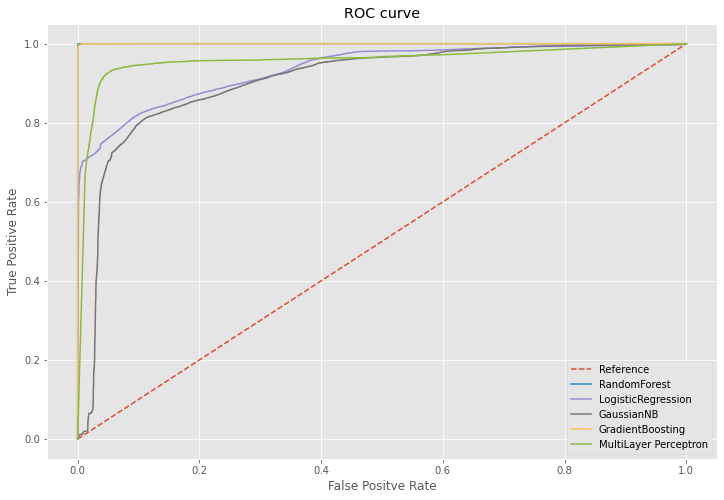

In [104]:
no_skill_prob = [0 for _ in range(len(y_test))]
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
print("No Skill AUC: ", no_skill_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)

prob_rf = mod_rf.predict_proba(X_test)[:,-1]
auc_rf = roc_auc_score(y_test,prob_rf)
print("RandomForest AUC: ", auc_rf)
rf_fpr, rf_tpr, _ = roc_curve(y_test, prob_rf)

# prob_svm = mod_svm.predict_proba(X_test)[:,-1]
# auc_svm = roc_auc_score(y_test, prob_svm)
# print("Support Vector Machine AUC: ", auc_svm)
# svm_fpr, svm_tpr, _ = roc_curve(y_test, prob_svm)

prob_lr = mod_lr.predict_proba(X_test)[:,-1]
auc_lr = roc_auc_score(y_test, prob_lr)
print("Logistic Regression AUC: ",auc_lr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_lr)

prob_nb = mod_gnb.predict_proba(X_test)[:,-1]
auc_nb = roc_auc_score(y_test, prob_nb)
print("Gaussian Naive Bayes AUC: ", auc_nb)
nb_fpr, nb_tpr, _ = roc_curve(y_test, prob_nb)

prob_gb = mod_gb.predict_proba(X_test)[:,-1]
auc_gb = roc_auc_score(y_test, prob_gb)
print("GradientBoosting AUC: ", auc_gb)
gb_fpr, gb_tpr, _ = roc_curve(y_test, prob_gb)

prob_mlp = mod_mlp.predict_proba(X_test)[:,-1]
auc_mlp = roc_auc_score(y_test, prob_mlp)
print("MultiLayer Perceptron AUC: ", auc_mlp)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, prob_mlp)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'Reference')
ax.plot(rf_fpr, rf_tpr, linestyle= '-', label= 'RandomForest')
# ax.plot(svm_fpr, svm_tpr, linestyle= '-', label= 'SupportVectorMachine')
ax.plot(lr_fpr, lr_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-', label= 'GradientBoosting')
ax.plot(mlp_fpr, mlp_tpr, linestyle='-', label= 'MultiLayer Perceptron')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
ax.legend(loc="lower right")

## Conclusion <a name="conclusion_security"></a>

While the results from the random forest classifier were better than the KNN classifer, there is still room for improvement. Future improvements to this model may include comparisons with other supervised learning classification algorithms (such as SVMs, Neural Networks,  Bayesian networks, etc.). In addition, we can attempt to optimize and fine-tune the parameters of the existing models.

In [57]:
# LEFT OFF ON SCALING  
# THEN TRAIN/TEST

In [58]:
# USE THE RECOMMENDED SCALING METHOD FOR CYBER SECURITY

Column 42, attack_type, specifies the severity of the attack. For the intrusion detection system, the severity of an attack is irrelevant as any attack can be sever. It does not help in classifying whether there was an attack or not, or which type of attack was observed. Thus the column 42 is removed from the data.

Initially, the model is supposed to detect whether there has been an attack or not (detection). Only then should it learn to classify the attacks. Thus the column 41 is removed for the initial model.

### Set Train / Test Splits <a name="train_test_security"></a>

In [ ]:
# combine the original train/test data set

#X = data.drop(columns='target',axis=1)
#y = data.target

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=10)

In [ ]:
train['target'] = train.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
test['target'] = test.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
data = train['target'].value_counts()
lab = ['normal','attack']
data 

In [18]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

NameError: name 'train_df' is not defined

### Correlation Matrix <a name="corr_matrix_security"></a>

In [42]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(32,32)) # this figure was too small
plt.rcParams["figure.figsize"] = (16,11)
# plt.figure()

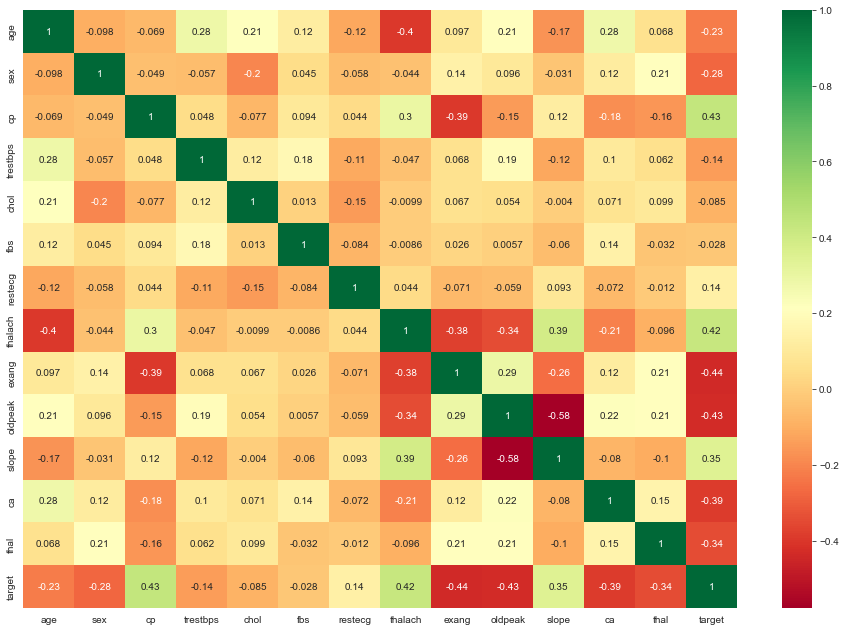

In [43]:
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

### Data Processing and Preparation <a name="dataprep_security"></a>

In [45]:
# Data processing
# determine cateogorical variables
list_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [46]:
print(len(list_categorical))

8


One hot encoding is just applicable to categorical data, 
<br/>so there is no need to "normalize" what is already categorical. 
<br/>Although, the rest of your numerical data should be normalized

In [48]:
# perform one-hot encoding
dataset = pd.get_dummies(df, columns = list_categorical)

In [49]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
# normalize data (except onehot encoding)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [51]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [52]:
dataset.shape

(303, 31)

In [53]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
indices = X.index

### Set Train / Test Splits <a name="train_test_security"></a>

In [54]:
# est the train/test splits (70 / 30 train/test)
# using the list comprehensions created earlier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Train set (indices):', indices_train)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Test set (indices): ', indices_test)

Train set: (212, 30) (212,)
Train set (indices): Int64Index([221, 244,  99, 184,  48, 134, 272,  55,  19, 177,
            ...
             44, 164,  94, 109, 252,  58,  87, 197, 174, 122],
           dtype='int64', length=212)
Test set: (91, 30) (91,)
Test set (indices):  Int64Index([113, 249,  18, 142, 299, 270, 294, 162,  13,  24, 117,  80,   6,
            205,  63, 195,  47,  45, 238, 188, 157, 116, 279, 152,  70, 178,
            298,  14,  92, 251, 235,  33, 123,  61, 228, 128,  46,  43, 172,
            295, 220, 274, 257,  84,  68, 155, 284, 239, 226, 112, 224,   1,
            101,  91,  12, 124,  64, 133, 204, 180,  11, 100,  39, 230, 185,
            277, 175,  16, 245, 211,  42, 296,  71, 153,  69, 241, 182, 118,
             83, 106, 129, 103, 282,  88, 300, 130,  93, 139, 215, 281, 137],
           dtype='int64')
